<a href="https://colab.research.google.com/github/abnd-me/Public/blob/main/Abhinandpp_Internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Load Dataset

In [4]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/credit.csv')

In [5]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [6]:
df.shape

(100000, 28)

In [7]:
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [8]:
numerical_features = ['Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance']

###outlier detection

In [10]:
from scipy.stats import zscore

z_scores = zscore(df[numerical_features])

z_scores.head()


,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,-1.527525,-0.958344,-0.819625,-0.744544,-0.913438,-0.741899,-1.319266,0.190946,-1.221347,-1.012183,0.120990,-0.464928,-0.533485,-1.067562,0.439200,-0.439448,-0.862311,-0.397733
1,-1.091089,-0.958344,-0.819625,-0.744544,-0.913438,-0.741899,-1.319266,0.190946,-1.221347,-1.493173,0.120990,-0.464928,-0.533485,-0.066489,0.449232,-0.439448,-0.862311,-0.535916
2,-0.654654,-0.958344,-0.819625,-0.744544,-0.913438,-0.741899,-1.319266,0.190946,-1.221347,-1.012183,0.120990,-0.464928,-0.533485,-0.718376,0.459264,-0.439448,-0.862311,-0.304920
3,-0.218218,-0.958344,-0.819625,-0.744544,-0.913438,-0.741899,-1.319266,0.190946,-1.086253,-1.493173,-0.635503,-0.464928,-0.533485,-0.177318,0.469296,-0.439448,-0.862311,-0.839300
4,0.218218,-0.958344,-0.819625,-0.744544,-0.913438,-0.741899,-1.319266,0.190946,-1.018705,-1.493173,0.120990,-0.464928,-0.533485,-1.463366,0.479328,-0.439448,-0.862311,-0.253945


In [49]:
print("Maximum value in z-score:", z_scores.max())
print("Minimum value in z-score:", z_scores.min())

Maximum value in z-score: Month                        1.527525
Age                          2.107215
Annual_Income                3.380803
Monthly_Inhand_Salary        3.454464
Num_Bank_Accounts            2.171433
Num_Credit_Card              2.644508
Interest_Rate                2.227123
Num_of_Loan                  2.234812
Delay_from_due_date          2.763932
Num_of_Delayed_Payment       1.873758
Changed_Credit_Limit         2.951786
Num_Credit_Inquiries         2.896151
Outstanding_Debt             3.092181
Credit_Utilization_Ratio     3.462058
Credit_History_Age           1.833659
Total_EMI_per_month         12.636649
Amount_invested_monthly      9.718572
Monthly_Balance              3.923761
dtype: float64
Minimum value in z-score: Month                      -1.527525
Age                        -1.794405
Annual_Income              -1.135772
Monthly_Inhand_Salary      -1.221945
Num_Bank_Accounts          -2.070265
Num_Credit_Card            -2.676988
Interest_Rate              

In [13]:

z_score_threshold = 3

# Identify outliers
outliers = (abs(z_scores) > z_score_threshold).any(axis=1)

# Display outliers
print("Outliers identified using Z-score:")
print(df[outliers])



Outliers identified using Z-score:
           ID  Customer_ID  Month    Name   Age          SSN  Occupation  \
16       5658        11708      1  Langep  34.0  486853974.0    Engineer   
17       5659        11708      2  Langep  34.0  486853974.0    Engineer   
50       5708        10314      3  Nadiaq  34.0  411510676.0      Lawyer   
51       5709        10314      4  Nadiaq  34.0  411510676.0      Lawyer   
52       5710        10314      5  Nadiaq  34.0  411510676.0      Lawyer   
...       ...          ...    ...     ...   ...          ...         ...   
99628  155074        29579      5   Leahh  25.0  769441950.0  Accountant   
99629  155075        29579      6   Leahh  25.0  769441950.0  Accountant   
99630  155076        29579      7   Leahh  25.0  769441950.0  Accountant   
99631  155077        29579      8   Leahh  25.0  769441950.0  Accountant   
99671  155137         2825      8  Lianau  31.0  228474867.0      Lawyer   

       Annual_Income  Monthly_Inhand_Salary  Num_Ban

In [17]:
from scipy.stats.mstats import winsorize


winsorize_percentage = 0.02

for feature in numerical_features:
    df[feature] = winsorize(df[feature], limits=winsorize_percentage)

#summary statistics after winsorization
print(df.describe())


Summary Statistics for Numerical Features after Winsorization:


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

                  ID    Customer_ID          Month            Age  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean    80631.500000   25982.666640       4.677450      34.233080   
std     43301.486619   14340.543051       2.365952      10.992695   
min      5634.000000    1006.000000       1.000000      17.000000   
25%     43132.750000   13664.500000       3.000000      25.000000   
50%     80631.500000   25777.000000       5.000000      34.000000   
75%    118130.250000   38385.000000       7.000000      43.000000   
max    155629.000000   50999.000000       8.000000      52.000000   

                SSN  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  1.000000e+05  100000.000000          100000.000000      100000.000000   
mean   5.004617e+08   50818.500316            4232.041565           5.720270   
std    2.908267e+08   37124.159227            3088.044826           2.632054   
min    8.134900e+04    9743.960000             839.864583 

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [15]:
df[feature]

0        312.494089
1        284.629162
2        331.209863
3        223.451310
4        341.489231
            ...    
99995    479.866228
99996    496.651610
99997    516.809083
99998    319.164979
99999    393.673696
Name: Monthly_Balance, Length: 100000, dtype: float64

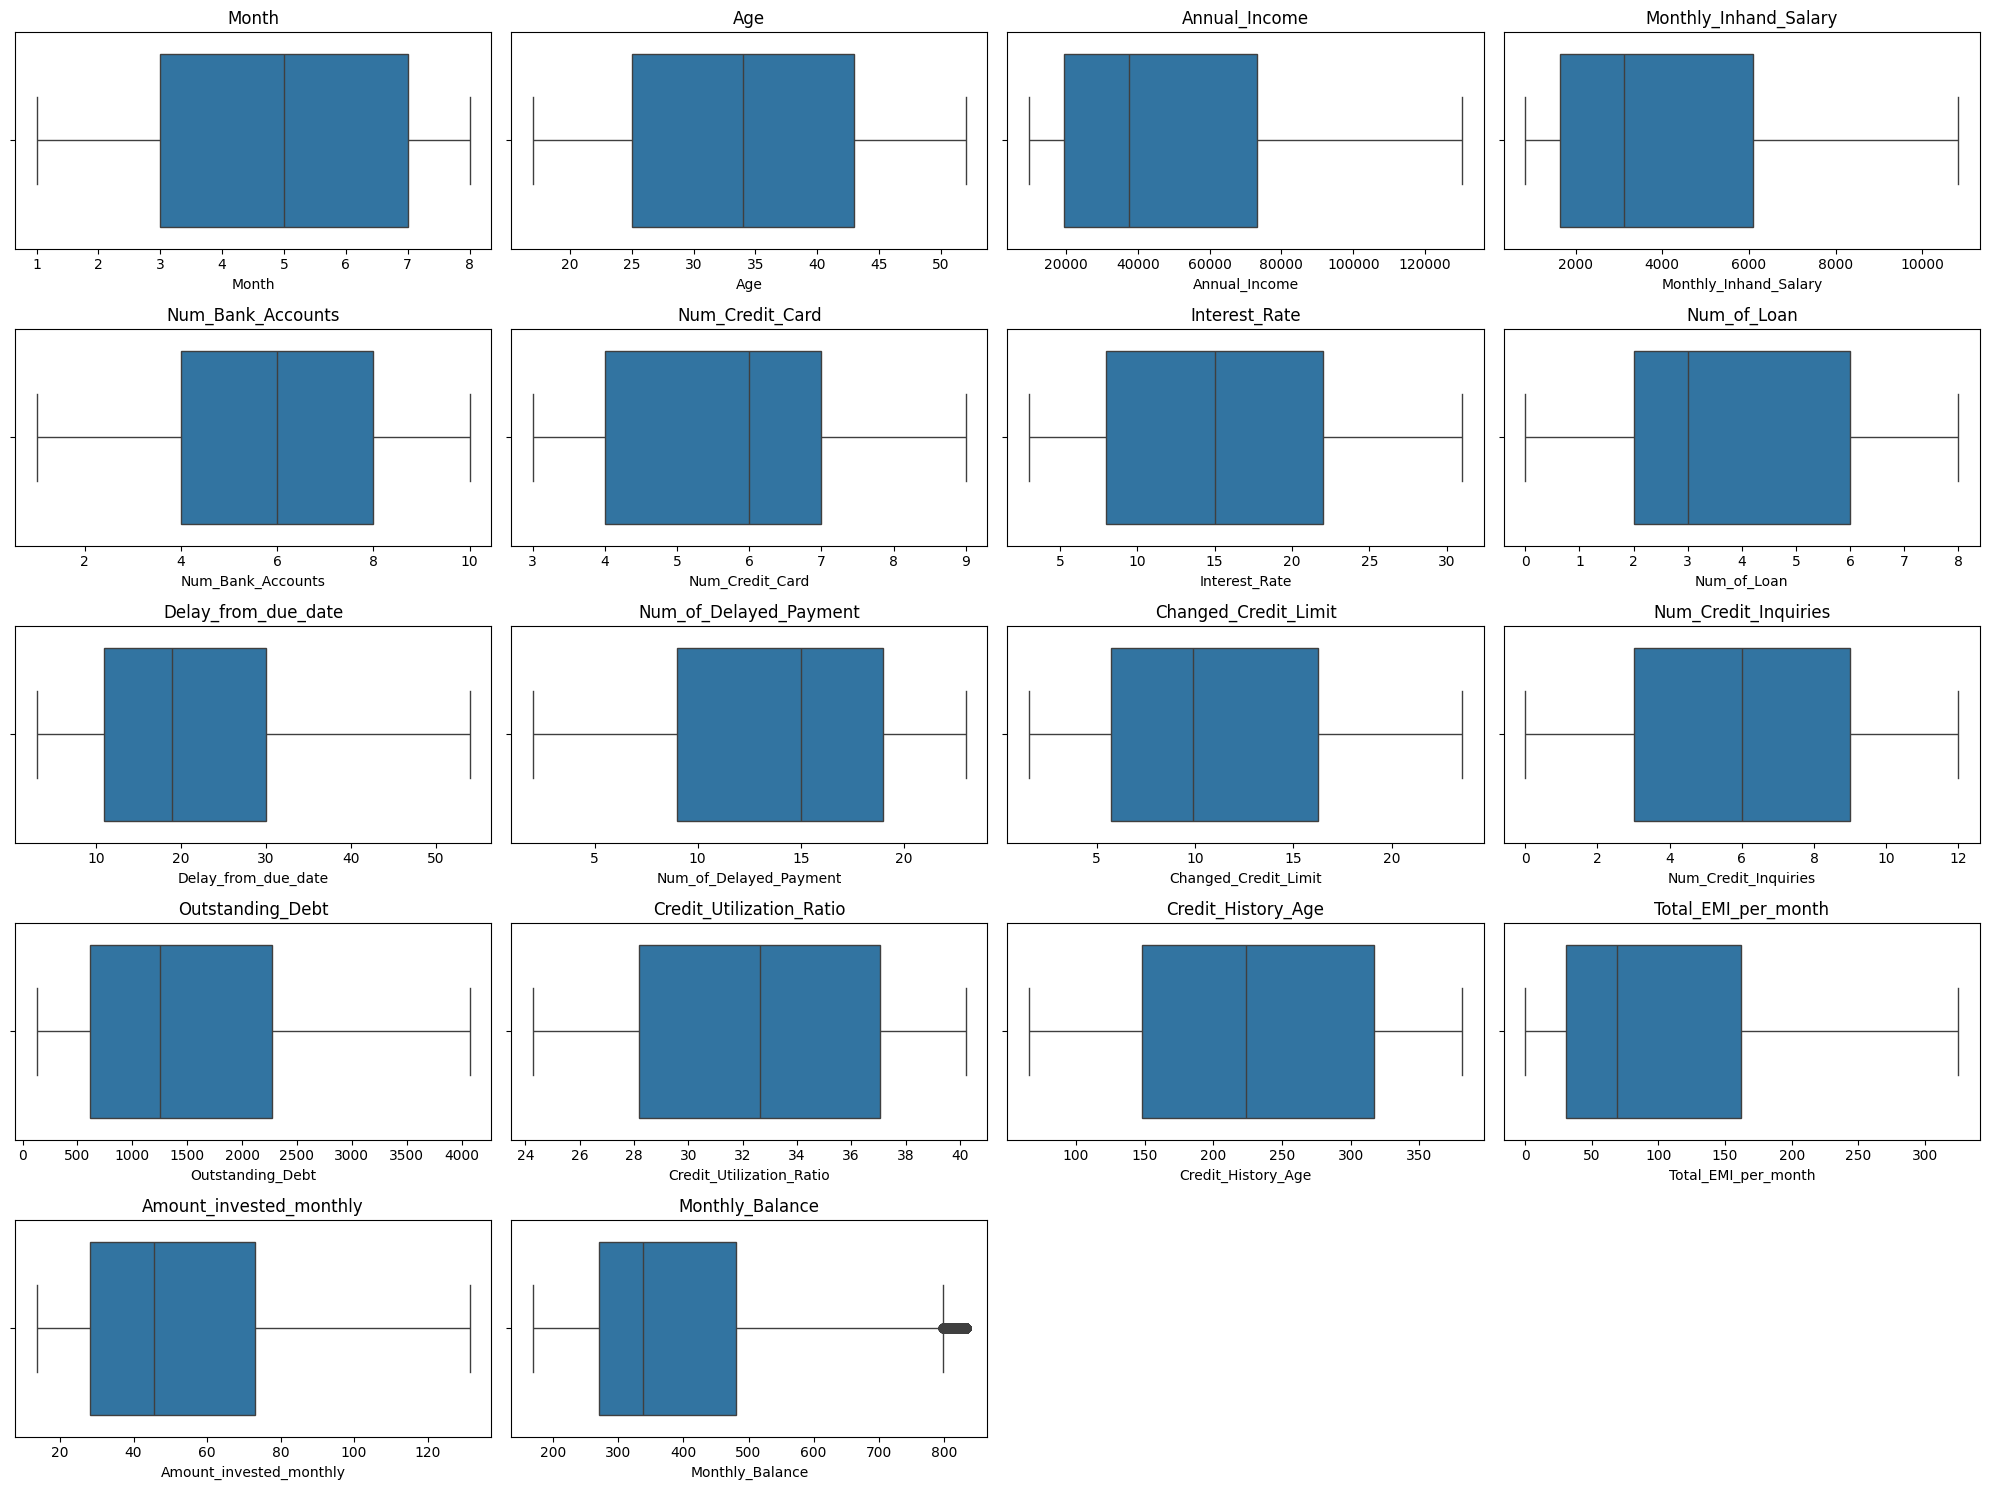

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

#boxplot after capping outliers
plt.figure(figsize=(20, 15))
num_cols = 4
num_rows = (len(numerical_features) - 1) // num_cols + 1
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

##EDA

In [20]:
print(df.describe())

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

                  ID    Customer_ID          Month            Age  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean    80631.500000   25982.666640       4.677450      34.233080   
std     43301.486619   14340.543051       2.365952      10.992695   
min      5634.000000    1006.000000       1.000000      17.000000   
25%     43132.750000   13664.500000       3.000000      25.000000   
50%     80631.500000   25777.000000       5.000000      34.000000   
75%    118130.250000   38385.000000       7.000000      43.000000   
max    155629.000000   50999.000000       8.000000      52.000000   

                SSN  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  1.000000e+05  100000.000000          100000.000000      100000.000000   
mean   5.004617e+08   50818.500316            4232.041565           5.720270   
std    2.908267e+08   37124.159227            3088.044826           2.632054   
min    8.134900e+04    9743.960000             839.864583 

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [28]:
df1 = df

credit_mix_new = {'Good': 3, 'Standard': 2, 'Bad': 1}
credit_score_new = {'Good': 3, 'Standard': 2, 'Poor': 1}

df1['Credit_Mix_Value'] = df1['Credit_Mix'].map(credit_mix_new)
df1['Credit_Score_Value'] = df1['Credit_Score'].map(credit_score_new)

In [32]:
numerical_features = ['Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance','Credit_Mix_Value','Credit_Score_Value']

In [33]:
df1[numerical_features].corr()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Mix_Value,Credit_Score_Value
Month,1.000000,0.142799,0.166372,0.165621,0.131673,0.133117,0.139246,0.136225,0.159902,0.118854,0.148285,0.237968,0.167557,0.122018,0.139987,0.191270,0.172718,0.177186,0.040144,0.047682
Age,0.142799,1.000000,0.263944,0.262788,-0.008941,0.032772,-0.023023,-0.019922,0.043358,-0.021681,0.042887,-0.074862,0.026619,0.154538,0.341175,0.139123,0.246981,0.295669,0.261158,0.182118
Annual_Income,0.166372,0.263944,1.000000,0.998564,0.007697,0.051524,0.001263,0.033112,0.079195,-0.012243,0.115223,-0.014780,0.067365,0.283408,0.380258,0.641213,0.853572,0.735925,0.301663,0.205676
Monthly_Inhand_Salary,0.165621,0.262788,0.998564,1.000000,0.008388,0.052331,0.001563,0.033912,0.079271,-0.011663,0.115073,-0.014258,0.067338,0.283476,0.379039,0.638192,0.854152,0.737382,0.300252,0.204436
Num_Bank_Accounts,0.131673,-0.008941,0.007697,0.008388,1.000000,0.519642,0.650499,0.552004,0.642196,0.649800,0.434052,0.592773,0.607694,0.096542,-0.273306,0.301505,0.060239,-0.002639,-0.591689,-0.306171
Num_Credit_Card,0.133117,0.032772,0.051524,0.052331,0.519642,1.000000,0.576184,0.505809,0.570655,0.486490,0.365262,0.536385,0.595113,0.108209,-0.208010,0.302772,0.090702,0.038491,-0.420916,-0.299072
Interest_Rate,0.139246,-0.023023,0.001263,0.001563,0.650499,0.576184,1.000000,0.628412,0.667939,0.627587,0.472447,0.693796,0.711288,0.100860,-0.339777,0.338133,0.056286,-0.018070,-0.610128,-0.389384
Num_of_Loan,0.136225,-0.019922,0.033112,0.033912,0.552004,0.505809,0.628412,1.000000,0.590443,0.538741,0.469225,0.632737,0.705410,0.082402,-0.365007,0.603411,0.074069,-0.111202,-0.505309,-0.274810
Delay_from_due_date,0.159902,0.043358,0.079195,0.079271,0.642196,0.570655,0.667939,0.590443,1.000000,0.608307,0.429759,0.619134,0.676899,0.131677,-0.227782,0.368647,0.124317,0.058365,-0.526853,-0.318118
Num_of_Delayed_Payment,0.118854,-0.021681,-0.012243,-0.011663,0.649800,0.486490,0.627587,0.538741,0.608307,1.000000,0.417330,0.564330,0.583645,0.080337,-0.286384,0.288178,0.036377,-0.022481,-0.636951,-0.297754


<ipython-input-34-b674d336ded3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


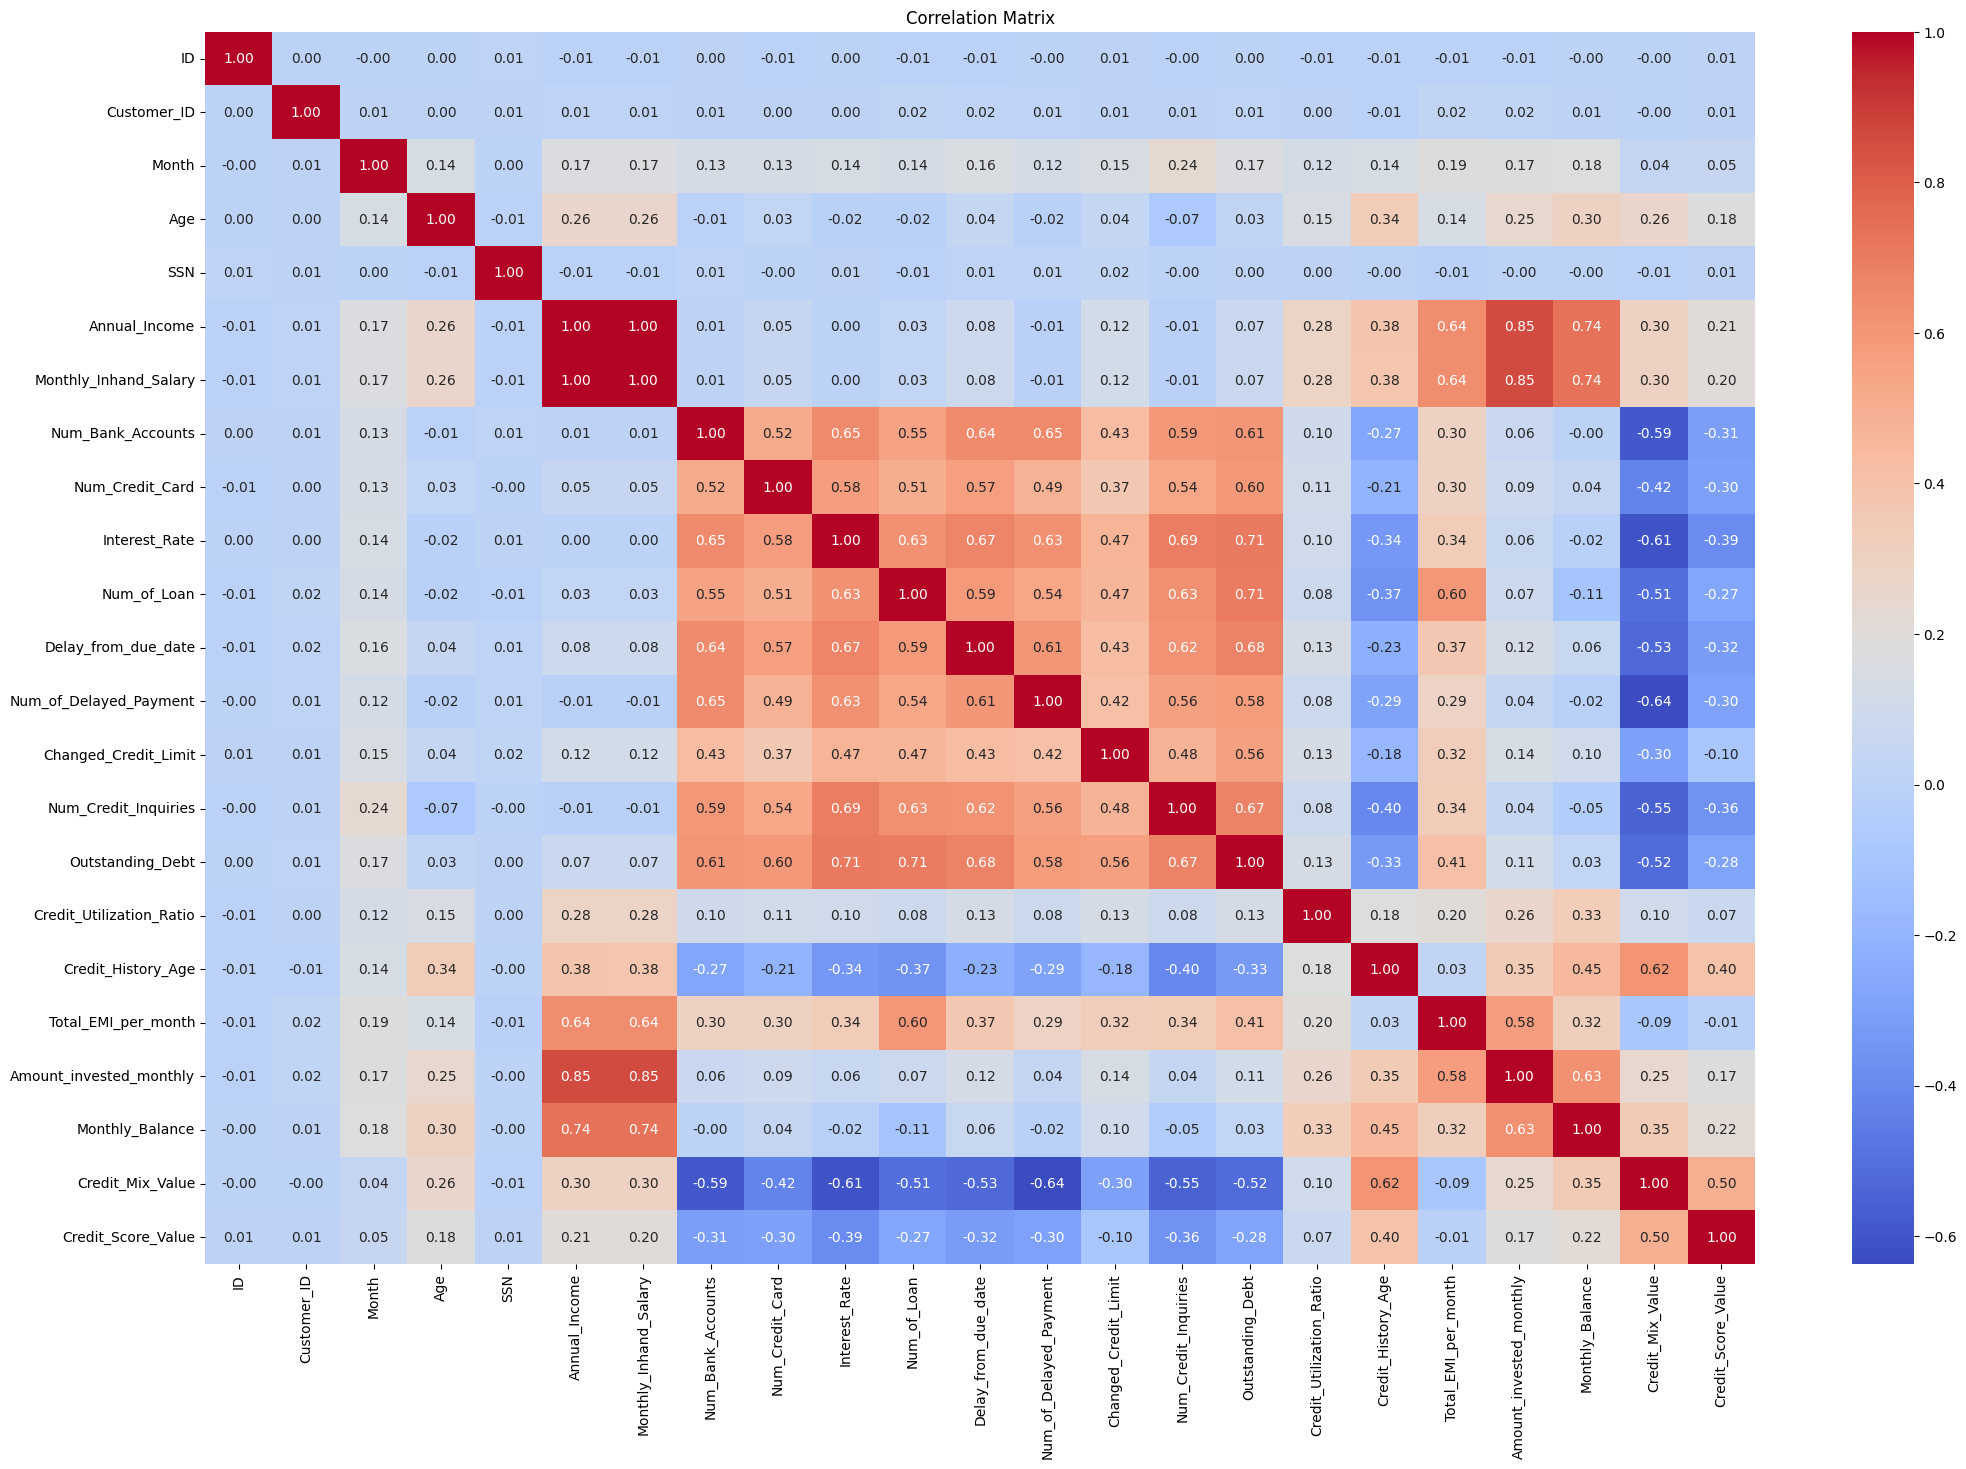

In [34]:
# Correlation matrix heatmap

correlation_matrix = df1.corr()

plt.figure(figsize=(25, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

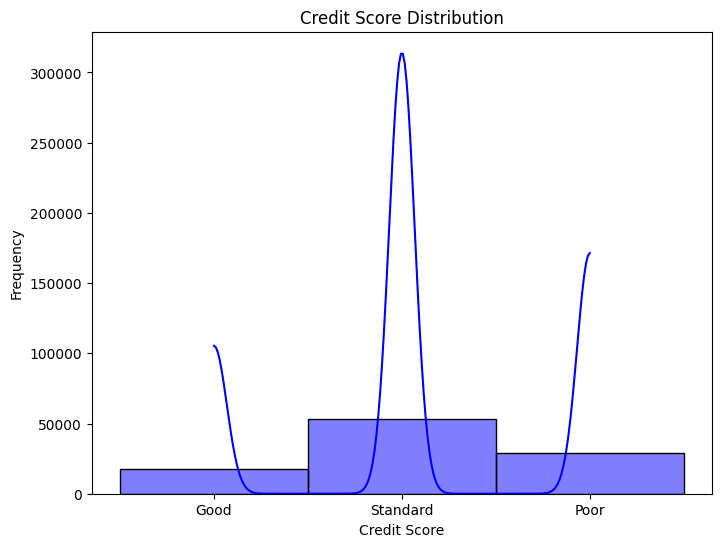

In [35]:
# Credit Score distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Credit_Score'], kde=True, color='blue', bins=20)
plt.title("Credit Score Distribution")
plt.xlabel("Credit Score")
plt.ylabel("Frequency")
plt.show()

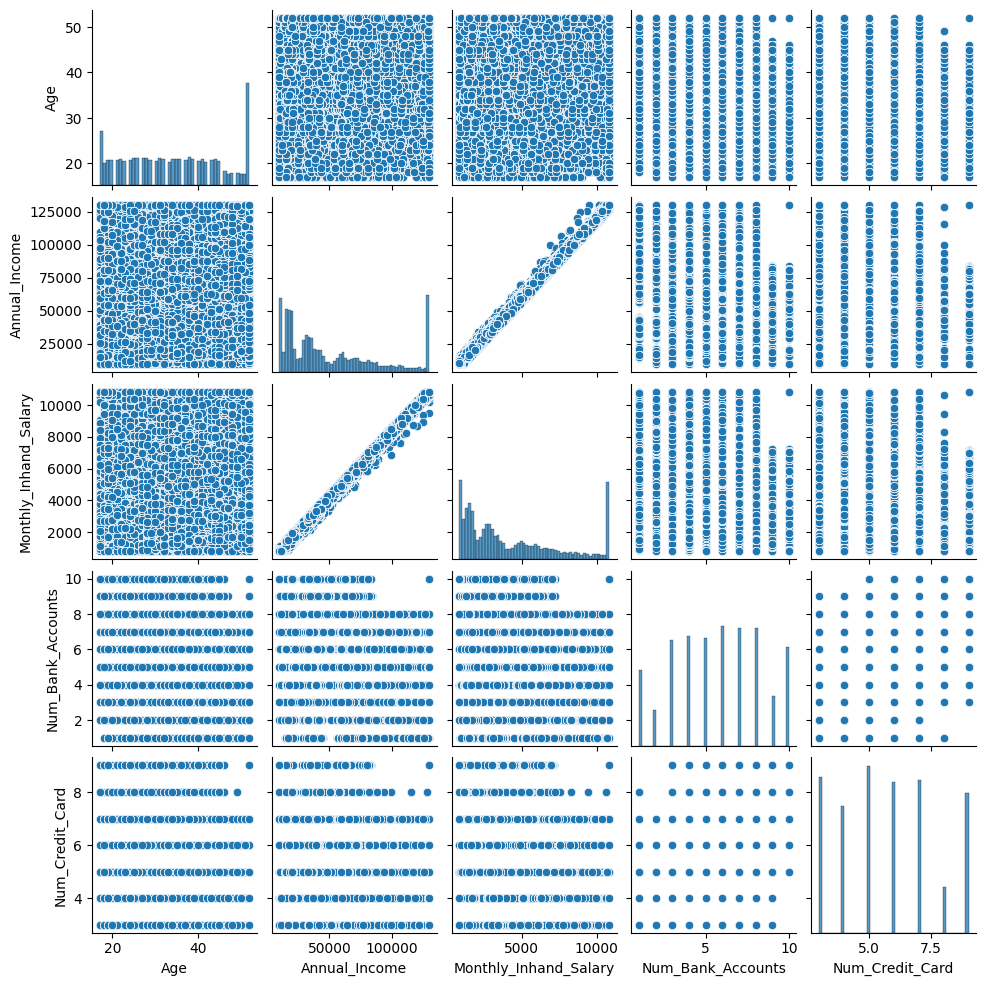

In [39]:
#pair plot
selected_features = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card']
sns.pairplot(df[selected_features], height = 2)
plt.show()

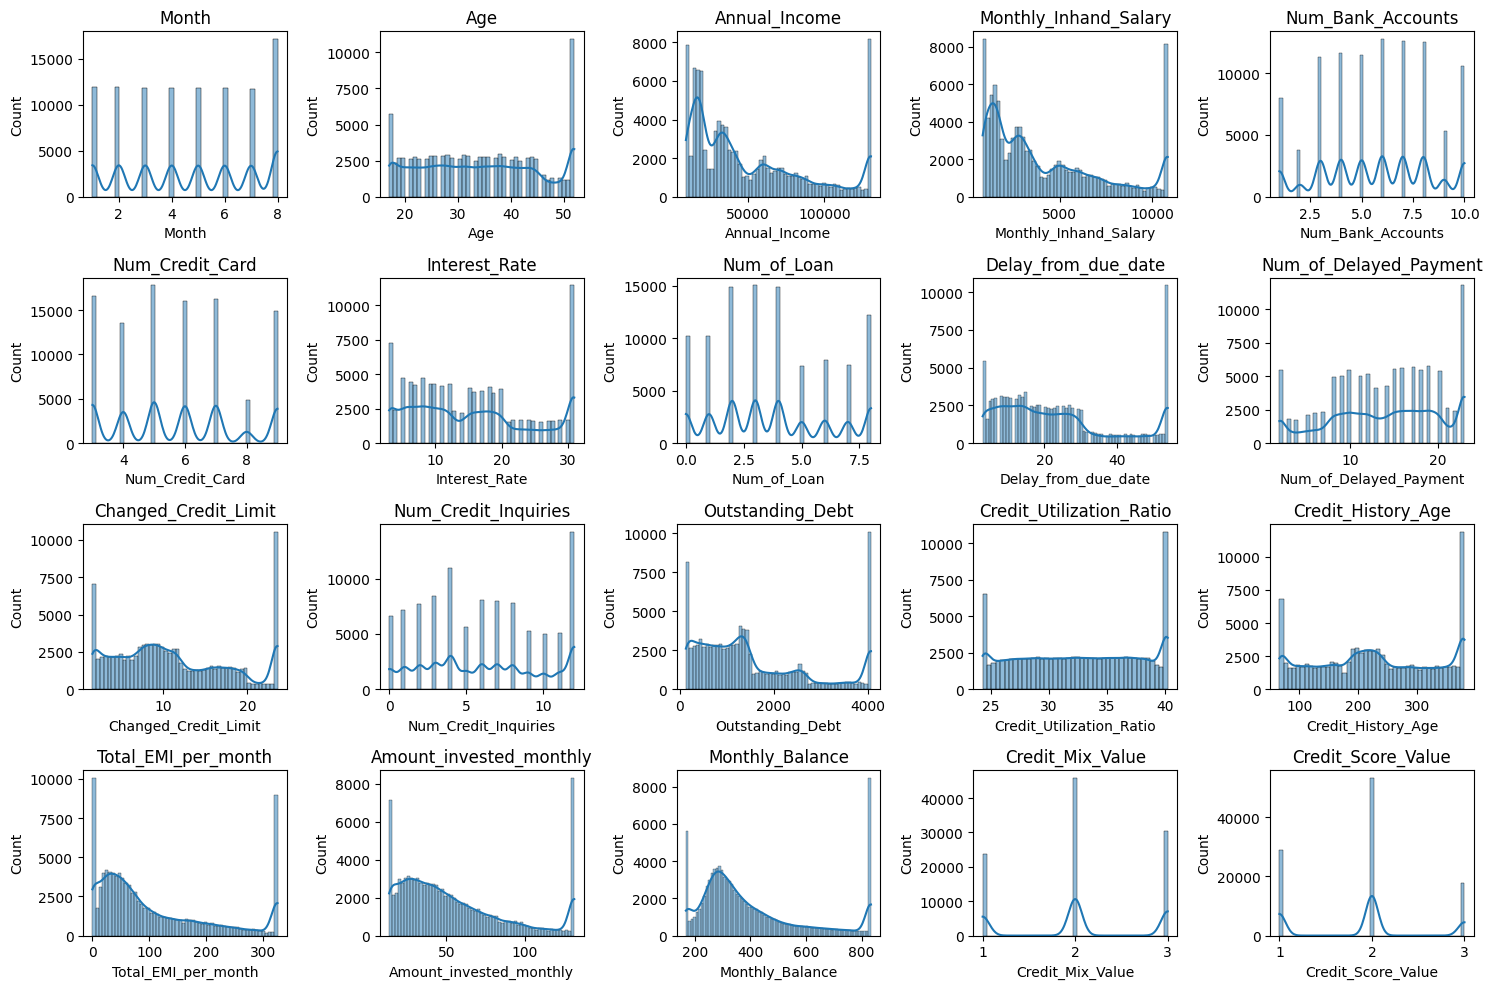

In [40]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 5, i)
    sns.histplot(df[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

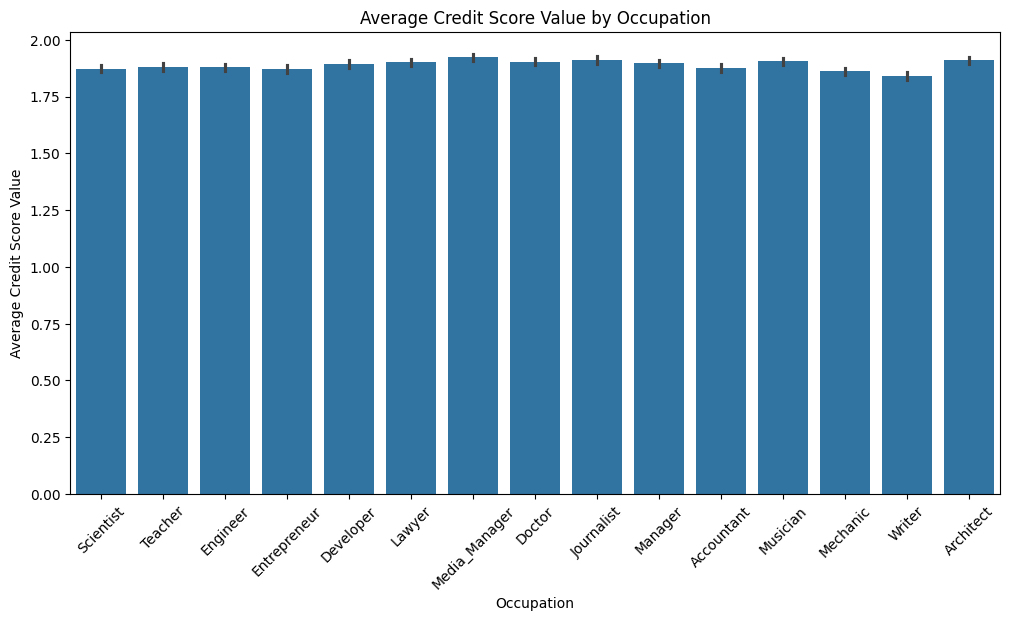

In [53]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Occupation', y='Credit_Score_Value', data=df1)
plt.title('Average Credit Score Value by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Credit Score Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


### we have to extract loan types and assign them to new column for training

In [50]:
# extract individual loan types
def extract_loan_types(loan_str):
    loan_types = [s.strip() for s in loan_str.split(',')]

    flat_loan_types = []
    for loan_type in loan_types:
        if 'and' in loan_type:
            flat_loan_types.extend(loan_type.split('and'))
        else:
            flat_loan_types.append(loan_type)


    return list(set([loan.strip() for loan in flat_loan_types]))

df['Individual_Loan_Types'] = df['Type_of_Loan'].apply(extract_loan_types)

print(df[['Type_of_Loan', 'Individual_Loan_Types']].head())

                                        Type_of_Loan  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...   
1  Auto Loan, Credit-Builder Loan, Personal Loan,...   
2  Auto Loan, Credit-Builder Loan, Personal Loan,...   
3  Auto Loan, Credit-Builder Loan, Personal Loan,...   
4  Auto Loan, Credit-Builder Loan, Personal Loan,...   

                               Individual_Loan_Types  
0  [Credit-Builder Loan, Home Equity Loan, , Pers...  
1  [Credit-Builder Loan, Home Equity Loan, , Pers...  
2  [Credit-Builder Loan, Home Equity Loan, , Pers...  
3  [Credit-Builder Loan, Home Equity Loan, , Pers...  
4  [Credit-Builder Loan, Home Equity Loan, , Pers...  


In [51]:
# Get unique individual loan types
all_loan_types = set()
for loan_types_list in df['Individual_Loan_Types']:
    all_loan_types.update(loan_types_list)

for loan_type in all_loan_types:
    df[loan_type] = df['Individual_Loan_Types'].apply(lambda x: 1 if loan_type in x else 0)

df.drop(columns=['Individual_Loan_Types'], inplace=True)
print(df.head())

DataFrame with New Columns for Individual Loan Types:
     ID  Customer_ID  Month           Name   Age          SSN Occupation  \
0  5634         3392      1  Aaron Maashoh  23.0  821000265.0  Scientist   
1  5635         3392      2  Aaron Maashoh  23.0  821000265.0  Scientist   
2  5636         3392      3  Aaron Maashoh  23.0  821000265.0  Scientist   
3  5637         3392      4  Aaron Maashoh  23.0  821000265.0  Scientist   
4  5638         3392      5  Aaron Maashoh  23.0  821000265.0  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...     \
0       19114.12            1824.843333                3.0  ...  1   
1       19114.12            1824.843333                3.0  ...  1   
2       19114.12            1824.843333                3.0  ...  1   
3       19114.12            1824.843333                3.0  ...  1   
4       19114.12            1824.843333                3.0  ...  1   

   Home Equity Loan  No Data Not Specified  Payday Loan  \
0        

In [52]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Credit_Mix_Value', 'Credit_Score_Value',
       'Credit-Builder Loan', '', 'Home Equity Loan', 'No Data',
       'Not Specified', 'Payday Loan', 'Debt Consolidation Loan',
       'Mortgage Loan', 'Personal Loan', 'Student Loan', 'Auto Loan'],
      dtype='object')

In [56]:
df = df.drop(columns=['No Data',''])

In [54]:
df.drop(columns=['Credit_Mix_Value', 'Credit_Score_Value'], inplace=True)


### Encoding

In [55]:
#do label encoding

from sklearn.preprocessing import LabelEncoder

#categorical variables
categorical_features = [ 'Occupation','Payment_of_Min_Amount',  'Credit_Mix', 'Payment_Behaviour']

#Apply label encoding
label_encoder = LabelEncoder()
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])


print(df.head())


     ID  Customer_ID  Month           Name   Age          SSN  Occupation  \
0  5634         3392      1  Aaron Maashoh  23.0  821000265.0          12   
1  5635         3392      2  Aaron Maashoh  23.0  821000265.0          12   
2  5636         3392      3  Aaron Maashoh  23.0  821000265.0          12   
3  5637         3392      4  Aaron Maashoh  23.0  821000265.0          12   
4  5638         3392      5  Aaron Maashoh  23.0  821000265.0          12   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...     \
0       19114.12            1824.843333                3.0  ...  1   
1       19114.12            1824.843333                3.0  ...  1   
2       19114.12            1824.843333                3.0  ...  1   
3       19114.12            1824.843333                3.0  ...  1   
4       19114.12            1824.843333                3.0  ...  1   

   Home Equity Loan  No Data Not Specified  Payday Loan  \
0                 1        0             0            0  

##Data Split

In [57]:
from sklearn.model_selection import train_test_split

X = df.drop(['ID', 'Customer_ID', 'Name',  'SSN','Type_of_Loan'], axis=1)  # Features
y = df['Credit_Score']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_val, X_test1, y_val, y_test1 = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
